# Домашние задание по уроку 3 (SkillFactory)

Подготовил: <b>Lek</b> <br/>
Slack: @Lek <br/>
telegram: @AlexLekov <br/>

### Оглавление:
* [1. Подгрузка данных](#1)
* [2. Анализ данных и генерация фитч](#2)
* [3. Logistics Regression](#3)
* [4. KNN](#4)
* [5. DecisionTree](#5)
* [6. Итого по моделям](#6)
* [7. Итоговая модель](#7)
* [8. Готовим  df_test и отправляем на Kaggle](#8)

======================================================================================================================

#### Описание задания

Коллеги подготовили для вас домашнее задание на классификацию. В рамках задания вам предлагается решить задачу и сразиться между собой в качестве. Задача на предсказание: согласится ли клиент на депозит. Найти задание можно по ссылке (для участия нужна регистрация на kaggle.com)

#### Нужно решить задачу с помощью 3х методов:
* кнн
* дерева принятия решения
* логистической регрессии
* и залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. 
#### Для зачета нужно:
* предоставить ноутбук с кодом, где вы попробовали все 3 метода
* залить предсказания для теста и найти себя в лидерборде

Команда, занявшая 1 место, получит дополнительный балл. 

Метрика качества ROC-AUC.

#### Порядок сдачи

Вовремя сделайте коммит на Kaggle, чтобы попасть в лидерборд. Не забудьте внутри ноутбука указать номер и состав команды.

#### PS:
Обсудить урок и домашнее задание можно в нашем Slack-чате на канале #lesson04

# Поехали!

![title](img/start.jpg)
 <a class="anchor" id="1"></a>

# 1. Подгрузка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('data/train.csv', encoding='utf8')
df_test = pd.read_csv('data/test.csv', encoding='utf8')

df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['target'] = 0
df = df_test.append(df_train, sort=False).reset_index(drop=True)

In [3]:
df.head(10)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,train_test,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0,0
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,0
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,0
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,0
5,aba2dec4c5cab88824f36babd24b986f,58,retired,married,professional.course,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,0
6,06f318f1dd178e738f675bb88a5adb84,48,services,married,high.school,unknown,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0,0
7,d5036f5956e42ee6207296238fc4bc1d,51,admin.,divorced,university.degree,unknown,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0,0
8,fe0cc8933698ad4046ff2b82f65756eb,24,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,0
9,70190122f4ebf196535e11b33eb95b81,36,technician,divorced,professional.course,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
train_test        41188 non-null int64
target      

### Описание столбцов

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-* employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)



 <a class="anchor" id="2"></a>
# 2. Анализ данных

![title](img/data.png)

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(df_train)

Number of variables,23
Number of observations,24712
Total Missing (%),0.0%
Total size in memory,4.3 MiB
Average record size in memory,184.0 B
Numeric,8
Categorical,10
Boolean,1
Date,0
Text (Unique),1
Rejected,3


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [7]:
# посмотрим количество уникальных значений для каждого столбца
for colum in df.columns:
    print(len(df[colum].value_counts()), colum)

41188 _id
78 age
12 job
4 marital
8 education
3 default
3 housing
3 loan
2 contact
10 month
5 day_of_week
1544 duration
42 campaign
27 pdays
8 previous
3 poutcome
10 emp.var.rate
26 cons.price.idx
26 cons.conf.idx
316 euribor3m
11 nr.employed
2 train_test
2 target


In [8]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

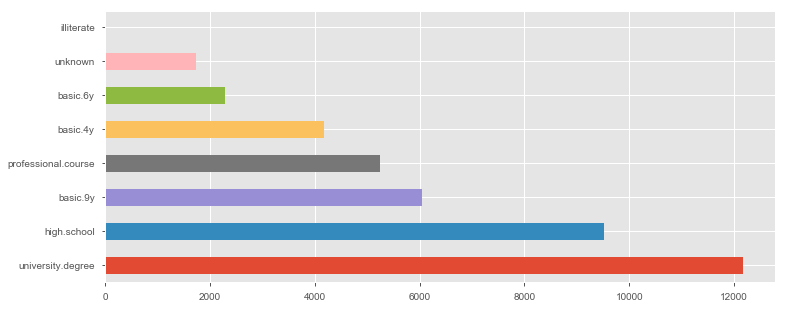

In [9]:
df['education'].value_counts().plot.barh()

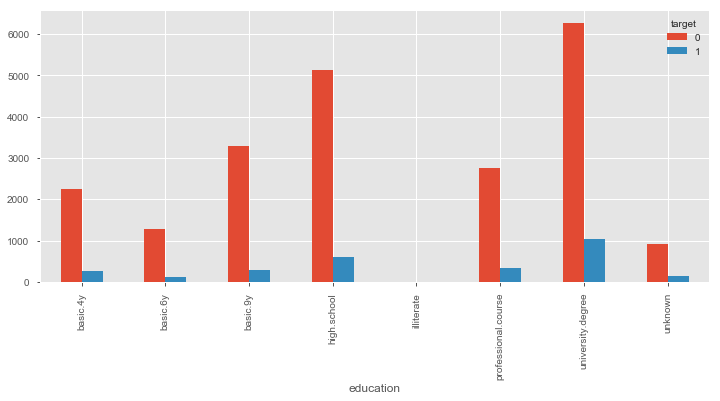

In [10]:
pd.crosstab(df_train.education, df_train.target).plot(kind='bar')

In [11]:
pd.crosstab(index=df['job'],columns=df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


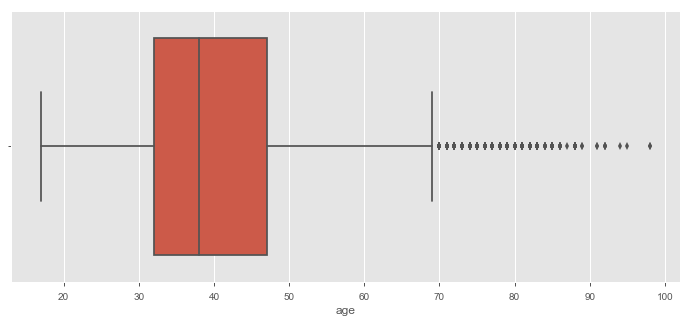

In [12]:
sns.boxplot(x=df["age"])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


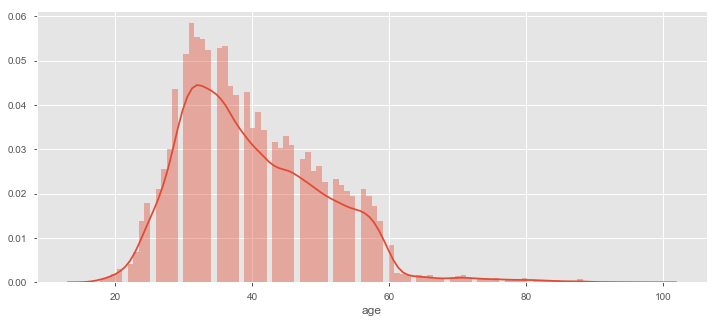

In [13]:
sns.distplot(df.age, bins=100)

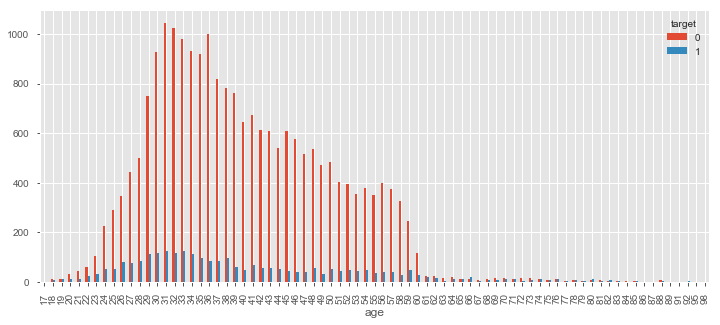

In [15]:
pd.crosstab(df_train.age, df_train.target).plot(kind='bar')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


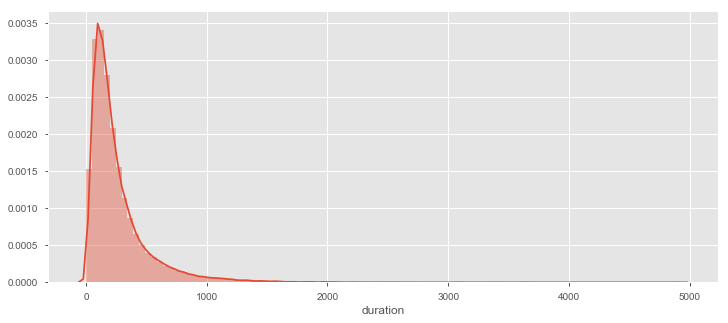

In [16]:
sns.distplot(df.duration, bins=100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


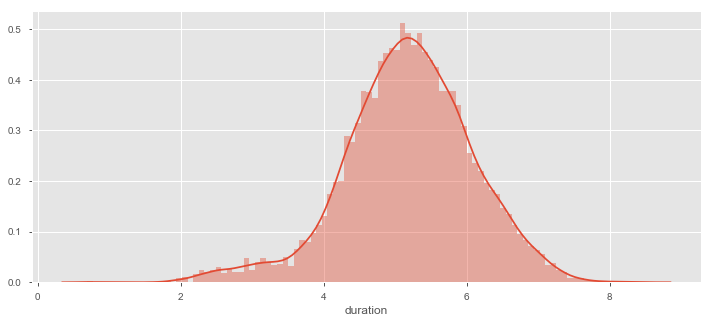

In [17]:
sns.distplot((df_train['duration'].map(lambda x: np.log(x+2))), bins=100)
# нужно нормализовывать для логрег

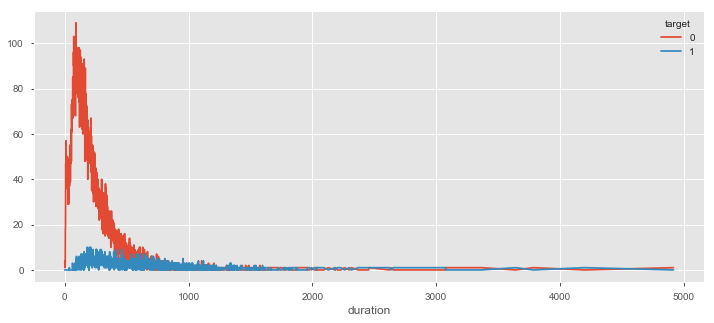

In [18]:
pd.crosstab(df_train.duration, df_train.target).plot()

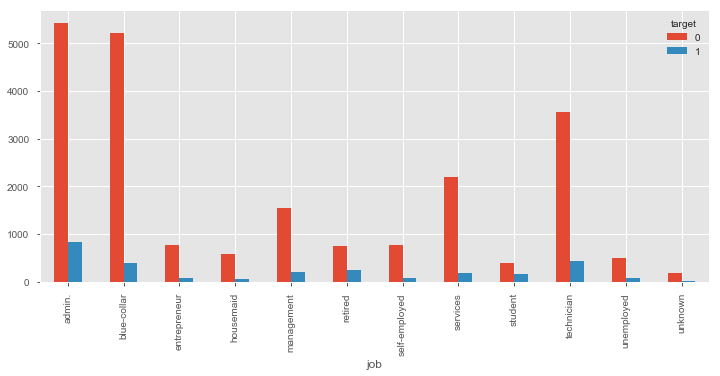

In [19]:
pd.crosstab(df_train.job, df_train.target).plot(kind='bar')

In [20]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

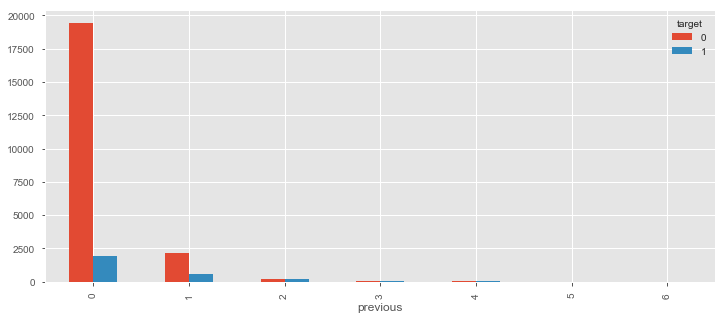

In [21]:
pd.crosstab(df_train.previous, df_train.target).plot(kind='bar')

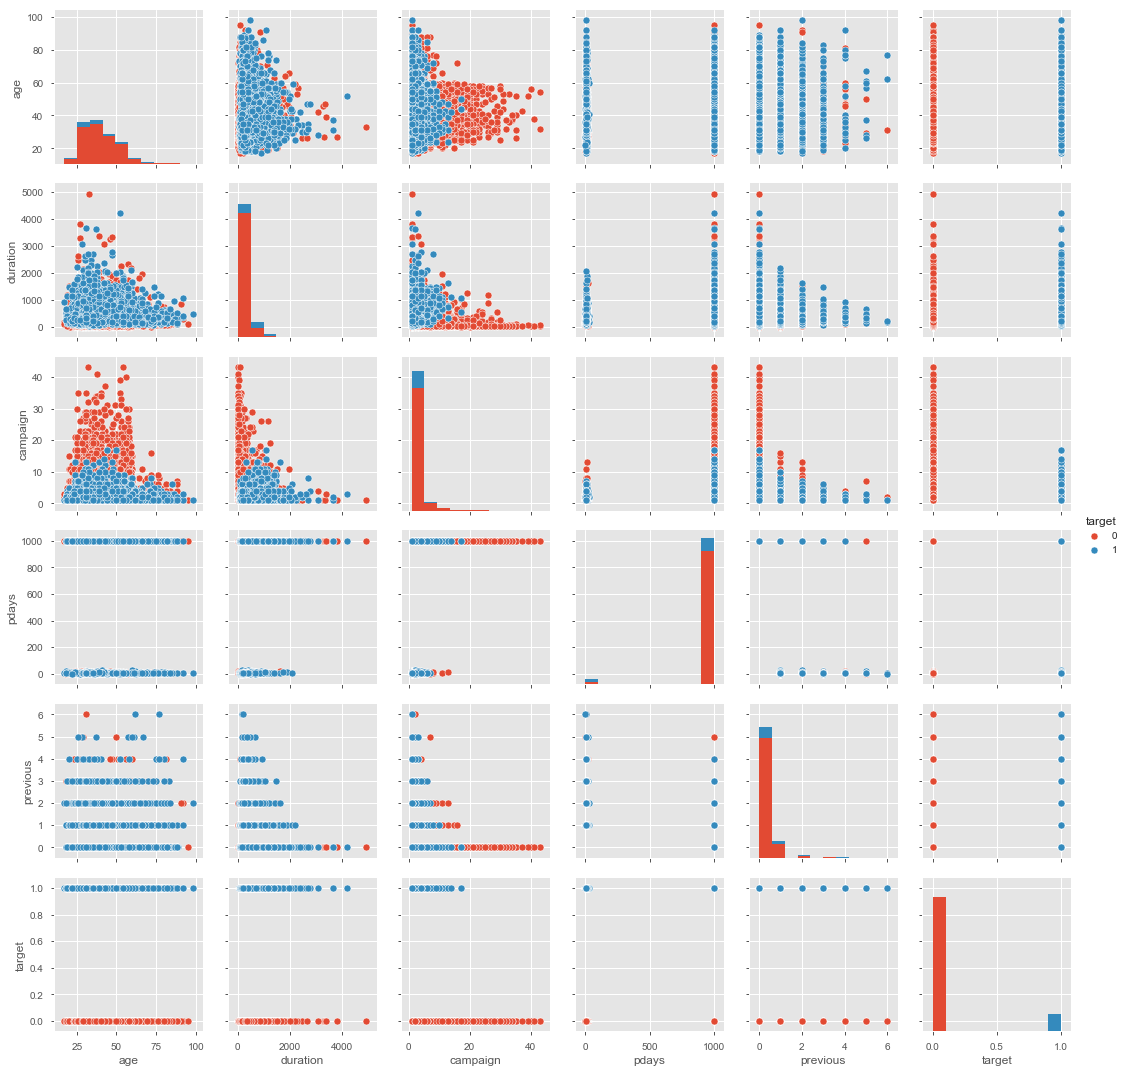

In [22]:
sns.pairplot(df_train[['age','duration','campaign','pdays','previous', 'target']],hue='target')

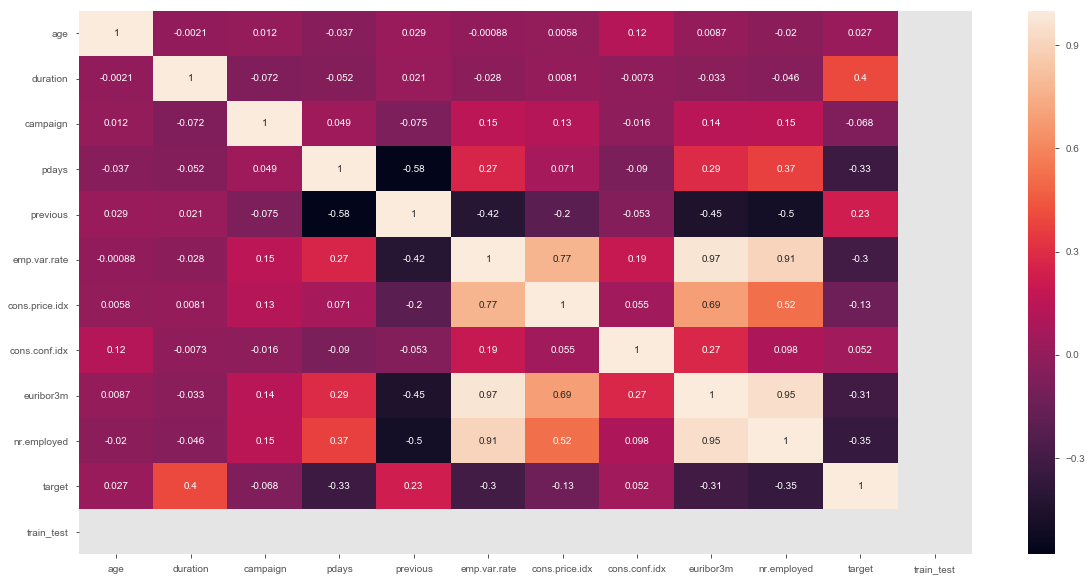

In [23]:
_, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train.corr(), annot=True, ax=ax)

## 2.2 Разведка боем и первичная предобработка данных

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from io import StringIO
#import pydot
from IPython.display import Image
from ipywidgets import interact, IntSlider, FloatSlider
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
train_test        41188 non-null int64
target      

### DecisionTreeClassifier

In [26]:
def preproc_data(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    
    # 2. Обработка object Columns
    # ############## N. One hot encoding ########################################################
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=object_columns,)
    
    return df_output

In [27]:
def cv_print (dt, X_train, y_train, skf):
    ''' clean print Cross Val Score '''
    cv = cross_val_score(dt, X_train, y_train, scoring='roc_auc', cv = skf, )
    print('Mean: ', cv.mean())
    print('Std: ', cv.std())
    print('='*40)

In [28]:
df_preproc = preproc_data(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#df_preproc.info()

((19769, 63), (19769,), (4943, 63), (4943,))

In [29]:
dt = DecisionTreeClassifier(random_state=42)
cv_print (dt, X_train, y_train, skf)

Mean:  0.7259567939126769
Std:  0.012289689601040047


In [30]:
dt = DecisionTreeClassifier(min_samples_split=500, # чтоб дерево не переобучалось так сильно
                            random_state=42)
cv_print (dt, X_train, y_train, skf)

Mean:  0.9372721392594568
Std:  0.006093250426952767


In [31]:
# другуе дело, давай посмотрим что там по выбраным фитчам:
dt.fit(X_train, y_train)
feature_names = X_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
dt_features = []

print("Feature importances:")
for f, idx in enumerate(indices):
    if importances[idx] > 0:
        print("{}. \t ({:.4f}), '{}', ".format(f + 1, importances[idx], feature_names[idx]))
        dt_features.append(feature_names[idx])

Feature importances:
1. 	 (0.4779), 'duration', 
2. 	 (0.3525), 'nr.employed', 
3. 	 (0.0508), 'euribor3m', 
4. 	 (0.0451), 'pdays', 
5. 	 (0.0320), 'cons.conf.idx', 
6. 	 (0.0135), 'month_oct', 
7. 	 (0.0131), 'age', 
8. 	 (0.0074), 'cons.price.idx', 
9. 	 (0.0024), 'month_may', 
10. 	 (0.0024), 'education_university.degree', 
11. 	 (0.0021), 'poutcome_success', 
12. 	 (0.0005), 'job_student', 
13. 	 (0.0001), 'day_of_week_wed', 
14. 	 (0.0001), 'month_nov', 
15. 	 (0.0000), 'job_housemaid', 
16. 	 (0.0000), 'education_professional.course', 
17. 	 (0.0000), 'day_of_week_fri', 


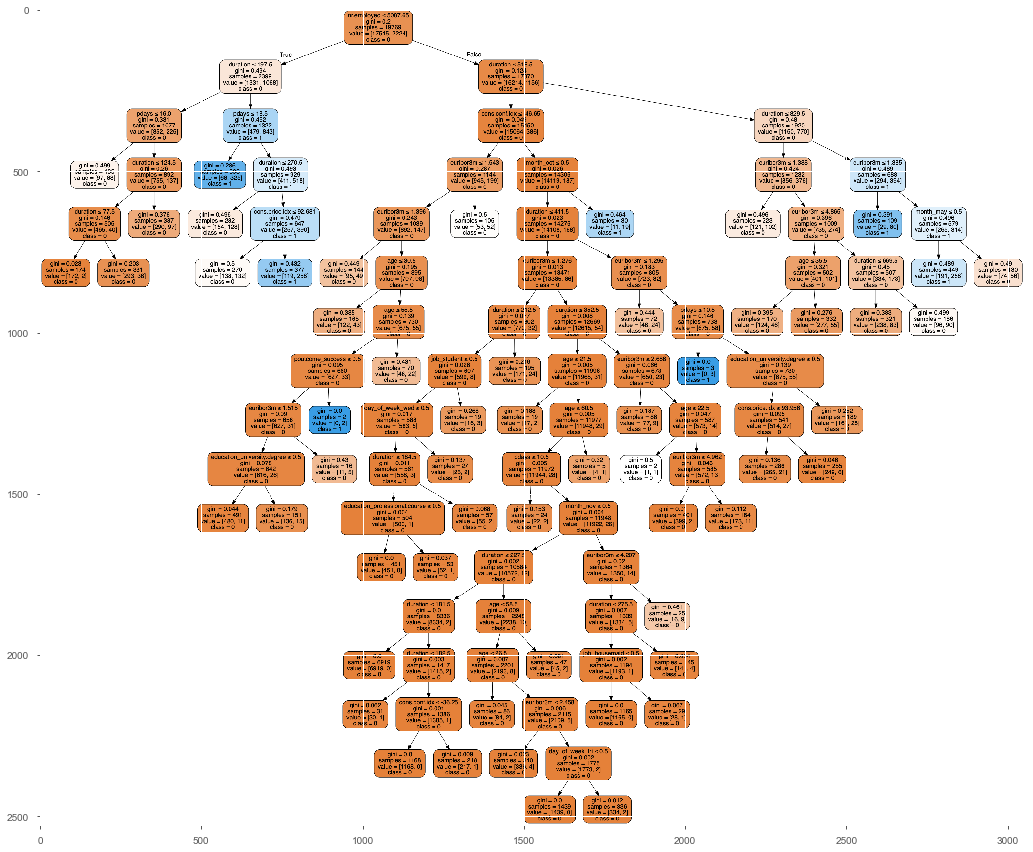

In [32]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,15)
with open('tree.dot', 'w') as fout:
    export_graphviz(dt, out_file=fout, feature_names=feature_names, class_names=['0', '1'], 
                   filled=True, rounded=True,  special_characters=True)
command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
subprocess.check_call(command)
plt.imshow(plt.imread('tree.png'))

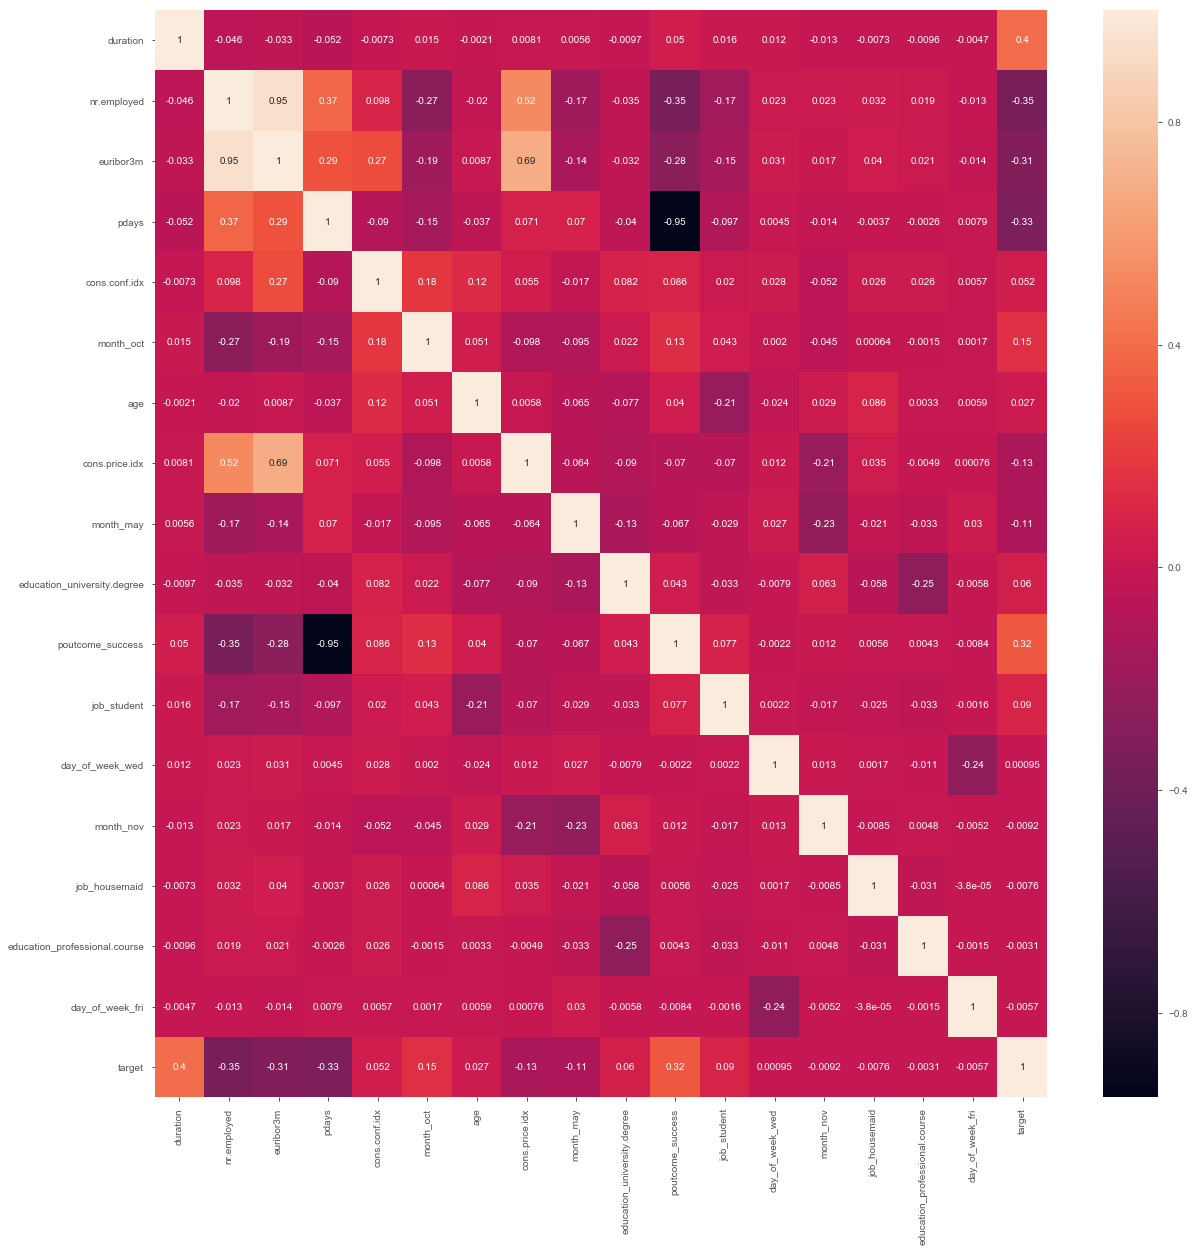

In [33]:
dt_features.append('target')
_, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_train_preproc[dt_features].corr(), annot=True, ax=ax)

In [34]:
# для интереса глянем какой скор можно выжать если использовать более продвинутые либы
# узнаем к чему стремиться)
import lightgbm as lgb

lb = lgb.LGBMClassifier()
cv_print (lb, X_train, y_train, skf)

Mean:  0.9480263611661928
Std:  0.00544315451671634


### LogisticRegression

In [35]:
def preproc_data(df_input, target='target'):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    
    # 2. Обработка object Columns
    # ############## N. One hot encoding ########################################################
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=object_columns,)
    
    return df_output

In [36]:
df_preproc = preproc_data(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

robust_scaler = RobustScaler().fit(X)
X_Rscaler = robust_scaler.transform(X)
X_train_Rscaler = robust_scaler.transform(X_train)
X_test_Rscaler = robust_scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#df_preproc.info()

((19769, 63), (19769,), (4943, 63), (4943,))

In [37]:
lr=LogisticRegression(random_state=42,)
cv_print(lr, X_train_Rscaler, y_train, skf)

Mean:  0.9316078488390358
Std:  0.006554580415046475


In [38]:
# сразу подтюним параметры
lr=LogisticRegression(C=2, class_weight='balanced', random_state=42,)
cv_print(lr, X_train_Rscaler, y_train, skf)

Mean:  0.9349053978321622
Std:  0.005899205241611857


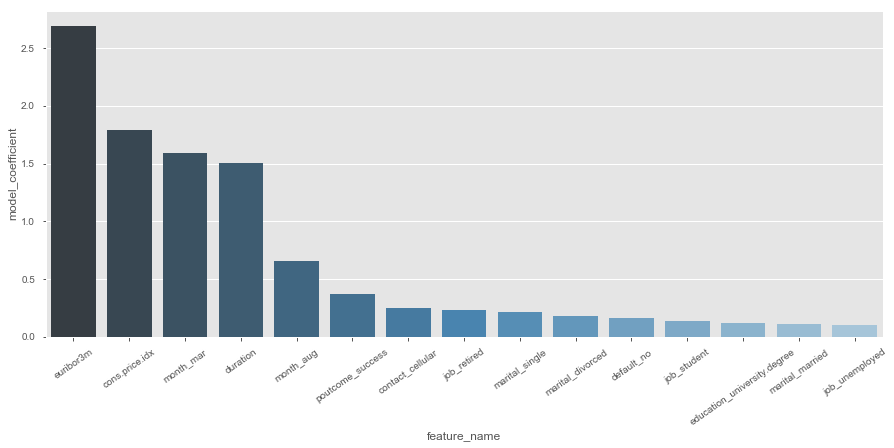

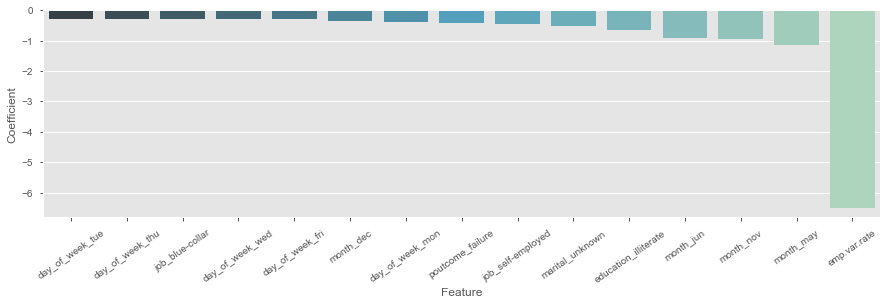

In [39]:
# Посмотрим что по фитчам
lr.fit(X_train_Rscaler, y_train)
# Get the models coefficients (and top 5 and bottom 5)
logReg_coeff = pd.DataFrame({'feature_name': X.columns.values.tolist(), 'model_coefficient': lr.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(15)
logReg_coeff_bottom = logReg_coeff.tail(15)
 
# Plot top 5 coefficients
plt.figure().set_size_inches(15, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=logReg_coeff_top.feature_name)
 
# Plot bottom 5 coefficients
plt.figure().set_size_inches(15,6)
fg4 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_bottom, palette="GnBu_d")
fg4.set_xticklabels(rotation=35, labels=logReg_coeff_bottom.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)

In [40]:
logReg_coeff.head(10)

,feature_name,model_coefficient
8,euribor3m,2.689880
6,cons.price.idx,1.791955
50,month_mar,1.592408
1,duration,1.504071
46,month_aug,0.656561
62,poutcome_success,0.372086
43,contact_cellular,0.251965
15,job_retired,0.229327
24,marital_single,0.216417
22,marital_divorced,0.179493


In [41]:
logReg_coeff.sort_values('model_coefficient',ascending=True).head(10)

,feature_name,model_coefficient
5,emp.var.rate,-6.496103
51,month_may,-1.157438
52,month_nov,-0.959150
49,month_jun,-0.915135
30,education_illiterate,-0.661743
25,marital_unknown,-0.508254
16,job_self-employed,-0.463969
60,poutcome_failure,-0.439934
56,day_of_week_mon,-0.375584
47,month_dec,-0.368821


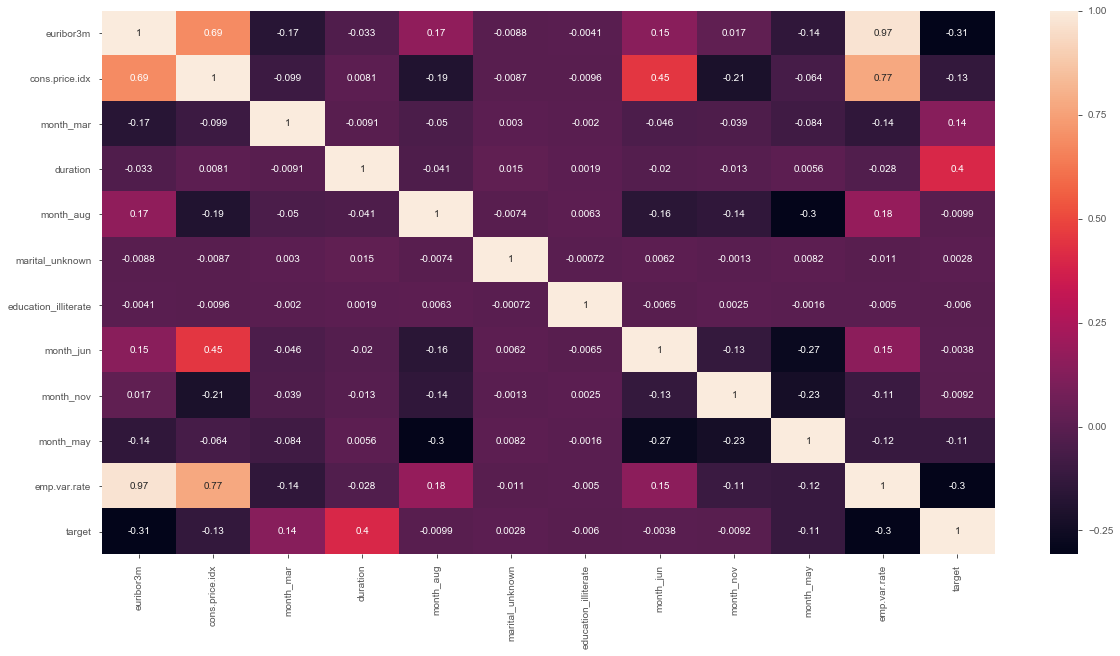

In [42]:
ft_tmp = logReg_coeff[(logReg_coeff['model_coefficient'] > 0.5) | (logReg_coeff['model_coefficient'] < -0.5)]
ft_tmp = np.append(ft_tmp['feature_name'].values,'target')
_, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train_preproc[ft_tmp].corr(), annot=True, ax=ax)

# Выводы:
- У нас есть одна основная фитча duration (попробуем покрутить ее)
- Основные Сопутствующие 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'nr.employed', 'age'
- Еще нужно обратить внимание на категориальную фитчу месяца и дня недели

### Мысли в слух:
Cкорее всего для Логрег нужно провести нормализацию данных и попробовать разные приобразования  
Вот за что я люблю алгоритмы на базе DecisionTree - они не так привередливы к сырости данных)

<a class="anchor" id="3"></a>
# 3. Продолжим с Logistics Regression
* Далее я подабовлял различных приобразований и нагенерировал фитчи. 
Негенерировал я их намного больше, чем то что попало в финальный варинат обработки, но большая их часть не давала прироста и по этому я просто удалил их из кода.
* Потом ручным методом перебора используемых фитч шел к улучшению score по CV. При переборе еще учитывал Feature importances самой лр (lr.coef_).  
Метод не лучший тк плохо автоматизируем, но как показал score на кегле, он оказался эффективней автоматического sklearn.feature_selection.RFE и ему подобных, возможно из за того что при переборе я учитывал не только рост score, но и std по фолдам.

In [75]:
def preproc_data_lr(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    

    ######### Выделить тех с кем еще не контактировали: #################################################
    #df_output['NoContact_GROUP_v1'] = 0
    #df_output.loc[(df_output['pdays'] == 999), 'NoContact_GROUP_v1'] = 1
    
    df_output['campaign_Zero_GROUP_'] = 0
    df_output.loc[(df_output['campaign'] > 1) , 'campaign_Zero_GROUP_'] = 1
    
    ######## duration_GROUPS ############################################################################ 

    ########################################################################################################
    
    df_output['pdays_mod'] = df_output['pdays']
    df_output.loc[(df_output['pdays'] == 999), 'pdays_mod'] = -1
    
    ######### log ##################################################################################
    num_col=[
             'duration',
             'euribor3m',
            #'pdays_mod',
            'age',
             'cons.price.idx',
             'cons.conf.idx',
            # 'nr.employed',
            ]
    
    for column in num_col:
        #df_output[column+'_log'] = df_output[column].apply(np.log)
        df_output[column+'_log'] = df_output[column].map(lambda x: np.log(x+100))

    #df_output['duration_log'] = df_output['duration'].map(lambda x: np.log(x+1))

    ########################################################################################################
    
    ######## up_quantile ############################################################################ 
    # ____________________ quantile 25 ________________________________________
    num_col=[
            'pdays_mod',
             'duration',
            #'duration_log',
             #'campaign',
             #'previous',
             #'age',
             'emp.var.rate',
             'cons.price.idx',
             'cons.conf.idx',
             'euribor3m',
             #'nr.employed'
            ]
  
    for column in num_col:
        # quantile 25 
        for qi in np.linspace(.25, 1, 3, 0):
            col_name_up = column+'_up_quantile_'+str(int(qi*100))
            col_name_donw = column+'_down_quantile_'+str(int(qi*100))
            df_output[col_name_up] = 0
            df_output[col_name_donw] = 0
            df_output.loc[df_output[column] > float(df_output[column].quantile(qi)), col_name_up] = 1
            df_output.loc[df_output[column] < float(df_output[column].quantile(qi)), col_name_donw] = 1
            
            
    ########################################################################################################

    ######## up_quantile V2 ############################################################################ 
    num_col_2=[
             'duration',
             'euribor3m',
            ]
    
    for column in num_col_2:
        df_tmp = df_output.copy()
        df_tmp = pd.get_dummies(pd.qcut(df_tmp[column], 10), prefix=column)
        df_output = pd.concat([df_output, df_tmp], axis=1,)
    
    ########################################################################################################
    
    ######## stats ########################################################################################
    num_col_3=[
             'duration',
             'euribor3m',
            'pdays_mod',
            'age',
             #'cons.price.idx',
             #'cons.conf.idx',
             #'nr.employed',
            #'campaign',
             #'previous',
            ]
    for column in num_col_3:
        df_output[column+'_norm'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].std()
        df_output[column+'_median'] = \
        (df_output[column].values - df_output[column].median()) / df_output[column].median()
        df_output[column+'_mean'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].mean()
    
    ########################################################################################################
        
      
    
    ########################################################################################################
    
    ######## education ##############################################################################
    
    df_output['education_mod_v2_str']=df_output['education']
    education_dict_v2 = {
                        'university.degree':'university.degree',
                        'high.school':'high.school',
                        'basic.9y':'basic',
                        'professional.course':'professional.course',
                        'basic.4y':'basic',
                        'basic.6y':'basic',
                        'unknown':'unknown',
                        'illiterate':'illiterate',
                        }
    df_output['education_mod_v2_str'] = df_output.loc[:,  'education_mod_v2_str'].replace(education_dict_v2)
    
    ########################################################################################################
    
    ######## status Work ##############################################################################
    df_output['employed'] = 0
    employed = ['admin','entrepreneur','management','self-employed',
                'services','technician','housemaid','blue-collar','retired']
    #unemployed =['student','umemployed','unknown',]
    df_output.loc[df_output.job.isin(employed),'employed']=1

    
    ##########################################################################################

    # Например:
    # ############## N. One hot encoding ########################################################
    
    encoding_columns=[
                     #'job',
                     #'marital',
                     #'education',
                    'education_mod_v2_str',
                     'default',
                    #'age_mod',
                     #'housing',
                     #'loan',
                     'contact',
                     'month',
                     'day_of_week',
                     'poutcome'
                        ]
    
    #encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)
    
    
    drop_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(drop_columns, inplace = True, axis = 1)
    
    df_output.drop(['pdays',
                    'euribor3m',
                    'pdays_mod',
                    'duration',
                    #'campaign',
                    #'previous',
                    #'job',
                    #'marital',
                    #'education',
                    #'default',
                    #'housing',
                    #'loan',
                    #'contact',
                     #'age',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'nr.employed',
                   ], inplace = True, axis = 1)
    
    
    
    #num_col_Norm=quantileNormalize(df_output[num_col])
    #df_output.drop(num_col, inplace = True, axis = 1)
    #df_output = pd.concat([df_output, num_col_Norm], axis=1,)
    
    return df_output

In [76]:
df_preproc = preproc_data_lr(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

robust_scaler = RobustScaler().fit(X)
X_Rscaler = robust_scaler.transform(X)
X_train_Rscaler = robust_scaler.transform(X_train)
X_test_Rscaler = robust_scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Columns: 109 entries, age to poutcome_success
dtypes: float64(17), int64(43), uint8(49)
memory usage: 20.8 MB


In [45]:
%%time
lr=LogisticRegression(C=2, 
                      # class_weight='balanced', # убрал параметр, с ним результаты хуже
                      random_state=42,)
cv_print(lr, X_train_Rscaler, y_train, skf)

Mean:  0.9443847771642668
Std:  0.00858570983561238
CPU times: user 9.28 s, sys: 355 ms, total: 9.64 s
Wall time: 8.64 s


![title](img/36.jpg)

In [46]:
# Другое дело, не зря старались

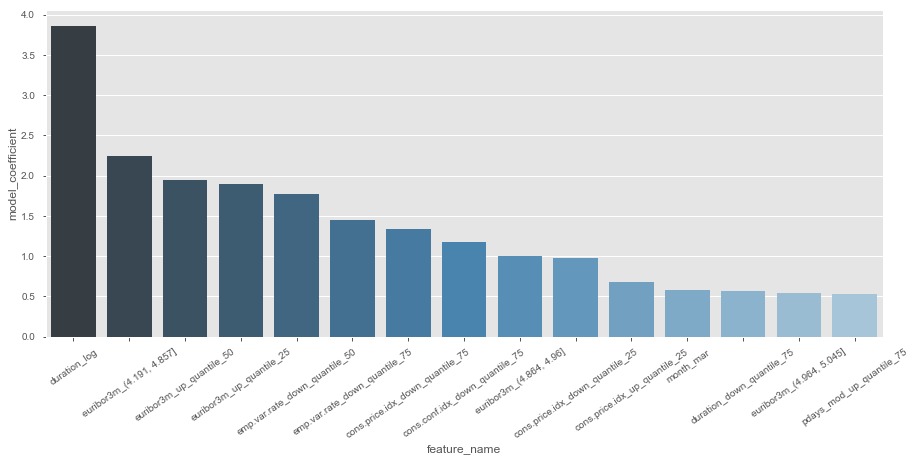

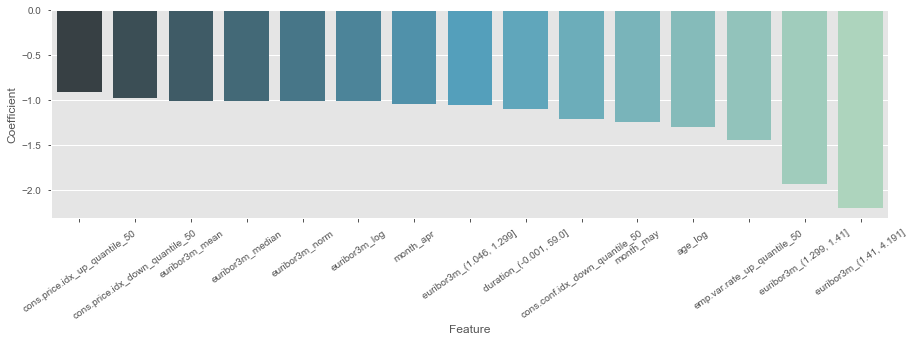

In [47]:
lr.fit(X_train_Rscaler, y_train)
# Get the models coefficients (and top 5 and bottom 5)
logReg_coeff = pd.DataFrame({'feature_name': X.columns.values.tolist(), 'model_coefficient': lr.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(15)
logReg_coeff_bottom = logReg_coeff.tail(15)
 
# Plot top 5 coefficients
plt.figure().set_size_inches(15, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=logReg_coeff_top.feature_name)
 
# Plot bottom 5 coefficients
plt.figure().set_size_inches(15,6)
fg4 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_bottom, palette="GnBu_d")
fg4.set_xticklabels(rotation=35, labels=logReg_coeff_bottom.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)

In [48]:
logReg_coeff.head(10)

,feature_name,model_coefficient
4,duration_log,3.859740
59,"euribor3m_(4.191, 4.857]",2.247926
41,euribor3m_up_quantile_50,1.944840
39,euribor3m_up_quantile_25,1.890985
24,emp.var.rate_down_quantile_50,1.766640
26,emp.var.rate_down_quantile_75,1.444468
32,cons.price.idx_down_quantile_75,1.340487
38,cons.conf.idx_down_quantile_75,1.168800
61,"euribor3m_(4.864, 4.96]",0.997165
28,cons.price.idx_down_quantile_25,0.970870


In [49]:
logReg_coeff.sort_values('model_coefficient',ascending=True).head(10)

,feature_name,model_coefficient
58,"euribor3m_(1.41, 4.191]",-2.201277
57,"euribor3m_(1.299, 1.41]",-1.937707
23,emp.var.rate_up_quantile_50,-1.444468
6,age_log,-1.306254
95,month_may,-1.241784
36,cons.conf.idx_down_quantile_50,-1.216449
45,"duration_(-0.001, 59.0]",-1.101093
56,"euribor3m_(1.046, 1.299]",-1.057667
89,month_apr,-1.040401
5,euribor3m_log,-1.016222


<a class="anchor" id="4"></a>
# 4. KNN

Поскольку этот метод был весьма медлительным, решил не заморачиваться и просто скопировать фитчи с логрег

In [50]:
df_preproc = preproc_data_lr(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

robust_scaler = RobustScaler().fit(X)
X_Rscaler = robust_scaler.transform(X)
X_train_Rscaler = robust_scaler.transform(X_train)
X_test_Rscaler = robust_scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#df_preproc.info()

((19769, 107), (19769,), (4943, 107), (4943,))

In [51]:
# еще перебрал параметры - но это делал на сервере, по этому тут сразу результат впишу

In [52]:
%%time
knn = KNeighborsClassifier(n_neighbors=70)
cv_print(knn, X_train_Rscaler, y_train, skf)

Mean:  0.9374530264595572
Std:  0.006089509196503486
CPU times: user 1min 23s, sys: 478 ms, total: 1min 24s
Wall time: 1min 24s


![title](img/vovka.jpg)

<a class="anchor" id="5"></a>
# 5. DecisionTree
* Аналогично Logreg добавил фитчи и перебрал те что дают прирост или понижают std (При оборе использовал Feature importances и SequentialFeatureSelector, смотри далее)
* Убрал приобразования и нормализацию (для деревьев это не нужно)

In [53]:
def preproc_data_dt(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    

    ######### Выделить тех с кем еще не контактировали: #################################################
    #df_output['NoContact_GROUP_v1'] = 0
    #df_output.loc[(df_output['pdays'] == 999), 'NoContact_GROUP_v1'] = 1
    
    df_output['campaign_Zero_GROUP_'] = 0
    df_output.loc[(df_output['campaign'] > 1) , 'campaign_Zero_GROUP_'] = 1
    
    ########################################################################################################
    
    #df_output['pdays_mod'] = df_output['pdays']
    #df_output.loc[(df_output['pdays'] == 999), 'pdays_mod'] = -1

    ######## stats ########################################################################################
    num_col_3=[
             'duration',
             'euribor3m',
            #'pdays_mod',
            #'age',
             #'cons.price.idx',
             #'cons.conf.idx',
             #'nr.employed',
            #'campaign',
             #'previous',
            ]
    for column in num_col_3:
        #df_output[column+'_norm'] = \
        #(df_output[column].values - df_output[column].mean()) / df_output[column].std()
        df_output[column+'_median'] = \
        (df_output[column].values - df_output[column].median()) / df_output[column].median()
        df_output[column+'_mean'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].mean()
    
    ########################################################################################################

    ########################################################################################################
    
    ######## education ##############################################################################
    
    
    ########################################################################################################
    
    ######## status Work ##############################################################################
    df_output['employed'] = 0
    employed = ['admin','entrepreneur','management','self-employed',
                'services','technician','housemaid','blue-collar','retired']
    #unemployed =['student','umemployed','unknown',]
    df_output.loc[df_output.job.isin(employed),'employed']=1

    
    ##########################################################################################

    # ############## N. One hot encoding ########################################################
    
    encoding_columns=[
                     #'job',
                     #'marital',
                     #'education',
                    #'education_mod_v2_str',
                     #'default',
                    #'age_mod',
                     #'housing',
                     #'loan',
                     #'contact',
                     'month',
                     'day_of_week',
                     'poutcome'
                        ]
    
    #encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)
    
    
    drop_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(drop_columns, inplace = True, axis = 1)
    
    df_output.drop(['pdays',
                    'euribor3m',
                    #'pdays_mod',
                    'duration',
                    'campaign',
                    #'previous',
                    #'job',
                    #'marital',
                    #'education',
                    #'default',
                    #'housing',
                    #'loan',
                    #'contact',
                     #'age',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'nr.employed',
                   ], inplace = True, axis = 1)
    
  
    return df_output

![title](img/kode.jpg)

In [54]:
df_preproc = preproc_data_dt(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
age                     41188 non-null int64
previous                41188 non-null int64
train_test              41188 non-null int64
target                  41188 non-null int64
campaign_Zero_GROUP_    41188 non-null int64
duration_median         41188 non-null float64
duration_mean           41188 non-null float64
euribor3m_median        41188 non-null float64
euribor3m_mean          41188 non-null float64
employed                41188 non-null int64
month_apr               41188 non-null uint8
month_aug               41188 non-null uint8
month_dec               41188 non-null uint8
month_jul               41188 non-null uint8
month_jun               41188 non-null uint8
month_mar               41188 non-null uint8
month_may               41188 non-null uint8
month_nov               41188 non-null uint8
month_oct               41188 non-null uint8
month_sep               4118

In [55]:
dt = DecisionTreeClassifier(min_samples_split=500,
                            random_state=42)
cv_print (dt, X_train, y_train, skf)

Mean:  0.9377662018917766
Std:  0.008410279943033054


In [56]:
dt.fit(X_train, y_train)
feature_names = X_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{}. \t ({:.4f}), '{}', ".format(f + 1, importances[idx], feature_names[idx]))

Feature importances:
1. 	 (0.3680), 'euribor3m_median', 
2. 	 (0.3470), 'duration_mean', 
3. 	 (0.1440), 'duration_median', 
4. 	 (0.0405), 'poutcome_success', 
5. 	 (0.0393), 'month_may', 
6. 	 (0.0236), 'month_apr', 
7. 	 (0.0149), 'month_oct', 
8. 	 (0.0140), 'age', 
9. 	 (0.0083), 'euribor3m_mean', 
10. 	 (0.0002), 'month_jul', 
11. 	 (0.0002), 'month_nov', 
12. 	 (0.0000), 'day_of_week_fri', 
13. 	 (0.0000), 'month_sep', 
14. 	 (0.0000), 'previous', 
15. 	 (0.0000), 'campaign_Zero_GROUP_', 
16. 	 (0.0000), 'poutcome_failure', 
17. 	 (0.0000), 'day_of_week_wed', 
18. 	 (0.0000), 'day_of_week_tue', 
19. 	 (0.0000), 'day_of_week_thu', 
20. 	 (0.0000), 'employed', 
21. 	 (0.0000), 'month_aug', 
22. 	 (0.0000), 'month_dec', 
23. 	 (0.0000), 'poutcome_nonexistent', 
24. 	 (0.0000), 'month_mar', 
25. 	 (0.0000), 'day_of_week_mon', 
26. 	 (0.0000), 'month_jun', 


In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [58]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [308]:
sfs = SFS(dt, 
          k_features=25, 
          forward=True, 
          floating=False, 
          scoring='roc_auc',
          verbose=1,
          cv=skf,
         n_jobs=4)

In [309]:
%%time
# поскольку и так запускал уже много раз, для проверки делаю на X и y 
# (чтоб проверить совпадение оcновных фитч, конечно есть риск оверфитнуться)
sfs = sfs.fit(X, y)

[Parallel(n_jobs=4)]: Done  26 out of  26 | elapsed:    0.6s finished
Features: 1/25[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    1.6s finished
Features: 2/25[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    2.2s finished
Features: 3/25[Parallel(n_jobs=4)]: Done  23 out of  23 | elapsed:    2.4s finished
Features: 4/25[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    2.2s finished
Features: 5/25[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    2.0s finished
Features: 6/25[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.8s finished
Features: 7/25[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    2.7s finished
Features: 8/25[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    2.8s finished
Features: 9/25[Parallel(n_jobs=4)]: Done  17 out of  17 | elapsed:    2.8s finished
Features: 10/25[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.9s finished
Features: 11/25[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    2.4s finished
Feat

CPU times: user 5.72 s, sys: 1.2 s, total: 6.93 s
Wall time: 1min 6s


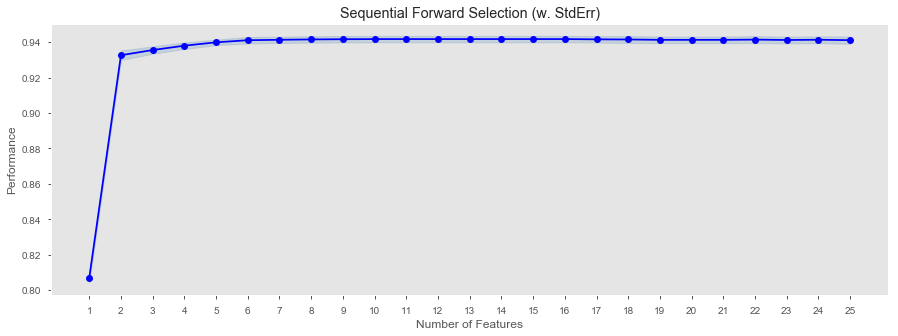

In [310]:
plt.rcParams["figure.figsize"] = (15,5)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [311]:
print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
CV Score:
0.9411145640201297


In [312]:
res = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
res

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.806968,0.00630004,"[0.812528295472561, 0.8194867344287052, 0.8049...","(3,)","(duration_median,)",0.00848247,0.00282749
2,0.932614,0.00599344,"[0.9336271976490855, 0.9367799466206419, 0.937...","(3, 5)","(duration_median, euribor3m_median)",0.00806966,0.00268989
3,0.935538,0.00461995,"[0.9384592880246206, 0.9380629471093264, 0.938...","(3, 5, 14)","(duration_median, euribor3m_median, month_may)",0.00622037,0.00207346
4,0.938,0.00416681,"[0.9421236027961238, 0.9401999192608608, 0.939...","(3, 5, 14, 25)","(duration_median, euribor3m_median, month_may,...",0.00561026,0.00187009
5,0.939887,0.00343234,"[0.9423172786660718, 0.9403527352426342, 0.944...","(3, 5, 14, 16, 25)","(duration_median, euribor3m_median, month_may,...",0.00462135,0.00154045
6,0.941081,0.00413857,"[0.9415147904623214, 0.9384502988492223, 0.947...","(0, 3, 5, 14, 16, 25)","(age, duration_median, euribor3m_median, month...",0.00557224,0.00185741
7,0.941324,0.0040065,"[0.9418416695677188, 0.9407245602250235, 0.947...","(0, 3, 5, 14, 16, 19, 25)","(age, duration_median, euribor3m_median, month...",0.00539441,0.00179814
8,0.941526,0.00401981,"[0.9418269600079758, 0.9407874844528125, 0.949...","(0, 3, 5, 14, 16, 18, 19, 25)","(age, duration_median, euribor3m_median, month...",0.00541234,0.00180411
9,0.941649,0.00412252,"[0.9417738421533488, 0.9406853347323758, 0.948...","(0, 3, 5, 14, 15, 16, 18, 19, 25)","(age, duration_median, euribor3m_median, month...",0.00555062,0.00185021
10,0.941717,0.00405279,"[0.9417738421533488, 0.9406853347323758, 0.948...","(0, 3, 5, 11, 14, 15, 16, 18, 19, 25)","(age, duration_median, euribor3m_median, month...",0.00545673,0.00181891


In [314]:
features=np.array(res['feature_names'][10])
features

array(['age', 'duration_median', 'euribor3m_median', 'month_jul',
       'month_may', 'month_nov', 'month_oct', 'day_of_week_fri',
       'day_of_week_mon', 'poutcome_success'], dtype='<U16')

In [59]:
# После многократного запуска с разными параметра и отбора по feature_importances_ остановился на этих фитчах
features=['age', 'duration_median', 'euribor3m_median', 'month_jul',
       'month_may', 'month_nov', 'month_oct', 'day_of_week_fri',
       'day_of_week_mon', 'poutcome_success', 'previous',]

In [60]:
dt.fit(X[features], y)
feature_names = X[features].columns
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'duration_median' (0.4887)
 2. feature 'euribor3m_median' (0.4150)
 3. feature 'month_may' (0.0350)
 4. feature 'poutcome_success' (0.0313)
 5. feature 'age  ' (0.0144)
 6. feature 'month_oct' (0.0137)
 7. feature 'day_of_week_mon' (0.0017)
 8. feature 'month_nov' (0.0001)
 9. feature 'day_of_week_fri' (0.0000)
10. feature 'previous' (0.0000)
11. feature 'month_jul' (0.0000)


In [61]:
len(features)

11

In [62]:
dt = DecisionTreeClassifier(min_samples_split=500,
                            #class_weight = 'balanced', 
                            random_state=42)
cv_print (dt, X_train[features], y_train, skf)

Mean:  0.9398912561003596
Std:  0.008156812178143152


In [63]:
# И на всей тестовой выборке
cv_print (dt, X[features], y, skf)

Mean:  0.9415510589025416
Std:  0.0049787036495339545


# HyperOpt

![title](img/ml.png)

In [132]:
%autosave 5
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval

import threading
from threading import Thread

import sys
from time import sleep
import time

import numpy as np
import pandas as pd

from numba import jit
from numba import autojit

import seaborn as sns
from matplotlib import pyplot
import pylab as pl
import math as m

from tqdm import tqdm, tqdm_notebook
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
#%pylab inline

Autosaving every 5 seconds


In [133]:
space = {
    'max_depth' : hp.choice('max_depth', np.arange(2, 50, dtype=int)),
    'min_samples_split' : hp.choice('min_samples_split', np.arange(50, 1000, 50, dtype=int)),
    #'min_samples_leaf' : hp.choice('min_samples_leaf', np.arange(10, 1000, 10, dtype=int)),
    #'max_features' : hp.choice('max_features', np.linspace(0.4, 1, 50)),
    }
                                                       

def hyper_opt_v3 (space):
    global df_res
    global calc
    
    dt = DecisionTreeClassifier(max_depth=int(space['max_depth']), 
                            min_samples_split=int(space['min_samples_split']), 
                            #min_samples_leaf=5,
                            #min_weight_fraction_leaf = 0.001,
                            #max_features=(space['max_features']),
                            #max_leaf_nodes=40,
                            #class_weight="balanced",
                            #min_impurity_decrease=0.0001,
                            random_state=42)
    dt_cv = cross_val_score(dt, X[features], y, scoring='roc_auc', cv = skf, n_jobs=1)
    res = dt_cv.mean()
    res_std = dt_cv.std()
    params = {
                'max_depth':int(space['max_depth']),
               'min_samples_split':(space['min_samples_split']),
        #'min_samples_leaf':int(space['min_samples_leaf']),
               #'max_features':(space['max_features']),
            }
    
    
    if res < 0: score_me=1000
    else: score_me=(res)*-1
    #progress bar
    pbar.update(1)
    
    calc+=1
    df_0 = pd.DataFrame([calc], columns=['evals_c'])
    df_1 = pd.DataFrame([params])
    df_2 = pd.DataFrame([res_std], columns=['std_auc'])
    df_3 = pd.DataFrame([res], columns=['mean_auc'])
    result = pd.concat([df_0, df_3, df_2, df_1,], axis=1)
    df_res = pd.concat([df_res, result], axis=0)
    return {
            'loss':int(score_me), 
            'status': STATUS_OK,
            }

def hyper_v1 (evals=10):
    best = fmin(
        fn=hyper_opt_v3,
        space=space,
        algo=tpe.suggest,
        max_evals=evals,
        #trials=trials,
    )
    print (best)
    pbar.close()
    #th.join()

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
#SETUP
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
evals=500
#%%time

df_res = pd.DataFrame()
calc=0
pbar = tqdm_notebook(total=evals)


#with tqdm_notebook(total=evals, file=sys.stdout) as pbar:
th = Thread(target=hyper_v1, args=(evals,))
th.start()
#th.stop()

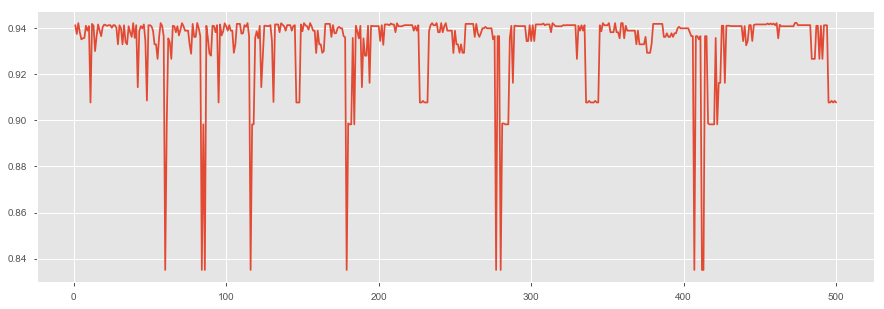

In [182]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df_res['evals_c'], df_res['mean_auc'],)

In [183]:
rez=df_res[(df_res.mean_auc >= 0.9421)]
rez=rez.drop_duplicates(subset=['mean_auc', 'std_auc'],keep='first')
rez

,evals_c,mean_auc,std_auc,max_depth,min_samples_split
0,3,0.942120,0.004588,26,550
0,81,0.942186,0.004508,10,550
0,473,0.942236,0.004410,9,350


In [167]:
%%time
dt = DecisionTreeClassifier(max_depth=9, 
                            min_samples_split=350,
                            random_state=42)
cv_print (dt, X[features], y, skf)

DecisionTree Mean:  0.9422358028603535
DecisionTree Std:  0.0044095544126410095
CPU times: user 682 ms, sys: 15 ms, total: 697 ms
Wall time: 365 ms


 <a class="anchor" id="6"></a>
# 6. Итого по моделям:
смотри CV по всей тестовой выборке

In [64]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [65]:
%%time
lr=LogisticRegression(C=2, random_state=42,)
cv_print (lr, X_Rscaler, y, skf)

Mean:  0.9437634878543433
Std:  0.004882338362411663
CPU times: user 13.1 s, sys: 398 ms, total: 13.5 s
Wall time: 12.6 s


In [66]:
%%time
knn = KNeighborsClassifier(n_neighbors=70, leaf_size=15)
cv_print (knn, X_Rscaler, y, skf)

Mean:  0.9397608105089585
Std:  0.005277728443898485
CPU times: user 2min 5s, sys: 616 ms, total: 2min 6s
Wall time: 2min 6s


In [67]:
%%time
dt = DecisionTreeClassifier(max_depth=9, 
                            min_samples_split=350,
                            random_state=42)
cv_print (dt, X[features], y, skf)

Mean:  0.9401720205606816
Std:  0.004858390175720513
CPU times: user 698 ms, sys: 12.2 ms, total: 710 ms
Wall time: 707 ms


In [77]:
# Смотрим  Test
lr.fit(X_train_Rscaler, y_train)
lr_predict = lr.predict(X_test_Rscaler)
lr_predict_proba = lr.predict_proba(X_test_Rscaler)
print('Logreg Test' )
print('roc_auc: ', '\t', roc_auc_score(y_test, lr_predict_proba[:,1]))
print('accuracy: ', '\t', accuracy_score(y_test, lr_predict))
print('precision: ', '\t', precision_score(y_test, lr_predict))
print('recall: ', '\t', recall_score(y_test, lr_predict))

print('='*30)
knn.fit(X_train_Rscaler, y_train)
knn_predict = lr.predict(X_test_Rscaler)
knn_predict_proba = knn.predict_proba(X_test_Rscaler)
print('KNN Test' )
print('roc_auc: ', '\t', roc_auc_score(y_test, knn_predict_proba[:,1]))
print('accuracy: ', '\t', accuracy_score(y_test, knn_predict))
print('precision: ', '\t', precision_score(y_test, knn_predict))
print('recall: ', '\t', recall_score(y_test, knn_predict))

print('='*30)
dt.fit(X_train[features], y_train)
dt_predict = dt.predict(X_test[features])
dt_predict_proba = dt.predict_proba(X_test[features])
print('DecisionTree Test' )
print('roc_auc: ', '\t', roc_auc_score(y_test, dt_predict_proba[:,1]))
print('accuracy: ', '\t', accuracy_score(y_test, dt_predict))
print('precision: ', '\t', precision_score(y_test, dt_predict))
print('recall: ', '\t', recall_score(y_test, dt_predict))


print('='*30)
print('Mean')
mean_predict=np.zeros(len(lr_predict_proba))
for i in range(len(lr_predict_proba)):
    mean_predict[i]=(
        lr_predict_proba[i,1]+dt_predict_proba[i,1]+knn_predict_proba[i,1])/3
print('roc_auc: ', '\t', roc_auc_score(y_test, mean_predict))

Logreg Test
roc_auc:  	 0.9374008884982281
accuracy:  	 0.912805988266235
precision:  	 0.6450116009280742
recall:  	 0.5
KNN Test
roc_auc:  	 0.934366662129608
accuracy:  	 0.912805988266235
precision:  	 0.6450116009280742
recall:  	 0.5
DecisionTree Test
roc_auc:  	 0.9314031564809698
accuracy:  	 0.9059275743475622
precision:  	 0.6022471910112359
recall:  	 0.48201438848920863
Mean
roc_auc:  	 0.9402342270245806


### попробуем Mean по моделям в CV

In [32]:
%%time
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
all_score_ls=[]
top2_score_ls=[]

# data lr & knn
df_preproc_lr = preproc_data_lr(df)
df_train_preproc_lr = df_preproc_lr.query('train_test == 1').drop(['train_test'], axis=1)
y = df_train_preproc_lr.target.values
X_lr = df_train_preproc_lr.drop(['target'], axis=1)
X_Rscaler = RobustScaler().fit_transform(X_lr)

# data dt
df_preproc_dt = preproc_data_dt(df)
df_train_preproc_dt = df_preproc_dt.query('train_test == 1').drop(['train_test'], axis=1)
X_dt = df_train_preproc_dt.drop(['target'], axis=1)[features]

# models
lr = LogisticRegression(C=2, random_state=42,)
knn = KNeighborsClassifier(n_neighbors=70)
dt = DecisionTreeClassifier(max_depth=9, 
                            min_samples_split=350,
                            random_state=42)


# добавил tqdm_notebook для визуализации этапа CV
for train_index, test_index in tqdm_notebook(skf.split(X_dt, y), total=10):
    
    X_train_f, X_test_f = np.array(X_Rscaler)[train_index], np.array(X_Rscaler)[test_index]
    X_train_dt, X_test_dt = np.array(X_dt)[train_index], np.array(X_dt)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    
    lr.fit(X_train_f, y_train)
    lr_1_predict_proba = lr.predict_proba(X_test_f)

    knn.fit(X_train_f, y_train)
    knn_1_predict_proba = knn.predict_proba(X_test_f)
     
    dt.fit(X_train_dt, y_train)
    dt_predict_proba = dt.predict_proba(X_test_dt)
    
    mean_predict_all=np.zeros(len(lr_1_predict_proba))
    for i in range(len(lr_1_predict_proba)):
        mean_predict_all[i]=(
            lr_1_predict_proba[i,1] + \
            dt_predict_proba[i,1] + \
            knn_1_predict_proba[i,1]) /3
        
    all_sore = roc_auc_score(y_test, mean_predict_all)
    all_score_ls.append(all_sore)
    print('roc_auc all models: ', '\t', round(all_sore,4))
    
    # 2 лучших
    mean_top2_predict=np.zeros(len(lr_1_predict_proba))
    for i in range(len(lr_1_predict_proba)):
        mean_top2_predict[i]=(lr_1_predict_proba[i,1] + dt_predict_proba[i,1])/2
    top2_sore = roc_auc_score(y_test, mean_top2_predict)
    top2_score_ls.append(top2_sore)
    print('roc_auc lr_1 + dt: ', '\t', round(top2_sore,4))
    print('_'*40)
    
print('Среднее по всем моделям')
print(np.mean(all_score_ls))
print(np.std(all_score_ls))
print('='*40)

print('Среднее по lr_1 + dt')
print(np.mean(top2_score_ls))
print(np.std(top2_score_ls))
print('='*40)

roc_auc all models:  	 0.9526
roc_auc lr_1 + dt:  	 0.9526
________________________________________
roc_auc all models:  	 0.9491
roc_auc lr_1 + dt:  	 0.9496
________________________________________
roc_auc all models:  	 0.9509
roc_auc lr_1 + dt:  	 0.9494
________________________________________
roc_auc all models:  	 0.944
roc_auc lr_1 + dt:  	 0.9426
________________________________________
roc_auc all models:  	 0.9546
roc_auc lr_1 + dt:  	 0.9525
________________________________________
roc_auc all models:  	 0.9498
roc_auc lr_1 + dt:  	 0.9489
________________________________________
roc_auc all models:  	 0.9421
roc_auc lr_1 + dt:  	 0.9421
________________________________________
roc_auc all models:  	 0.9472
roc_auc lr_1 + dt:  	 0.947
________________________________________
roc_auc all models:  	 0.9407
roc_auc lr_1 + dt:  	 0.9404
________________________________________
roc_auc all models:  	 0.942
roc_auc lr_1 + dt:  	 0.9423
________________________________________

Ср

In [ ]:
### По итогу выбрал mean по всем 3-м моделям

 <a class="anchor" id="7"></a>
# 7. Итоговая модель:
Этот результат мы примем как основной при вопросе <b>"Что у тебя получилось?"</b>  
Сделал так чтоб можно было запустить только этот кусок кода и все работало

In [69]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm, tqdm_notebook
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display

In [70]:
df_train = pd.read_csv('data/train.csv', encoding='utf8')
df_test = pd.read_csv('data/test.csv', encoding='utf8')

df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['target'] = 0
df = df_test.append(df_train, sort=False).reset_index(drop=True)

In [71]:
def preproc_data_lr(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    

    ######### Выделить тех с кем еще не контактировали: #################################################
    #df_output['NoContact_GROUP_v1'] = 0
    #df_output.loc[(df_output['pdays'] == 999), 'NoContact_GROUP_v1'] = 1
    
    df_output['campaign_Zero_GROUP_'] = 0
    df_output.loc[(df_output['campaign'] > 1) , 'campaign_Zero_GROUP_'] = 1
    
    ######## duration_GROUPS ############################################################################ 

    ########################################################################################################
    
    df_output['pdays_mod'] = df_output['pdays']
    df_output.loc[(df_output['pdays'] == 999), 'pdays_mod'] = -1
    
    ######### log ##################################################################################
    num_col=[
             'duration',
             'euribor3m',
            #'pdays_mod',
            'age',
             'cons.price.idx',
             'cons.conf.idx',
            # 'nr.employed',
            ]
    
    for column in num_col:
        #df_output[column+'_log'] = df_output[column].apply(np.log)
        df_output[column+'_log'] = df_output[column].map(lambda x: np.log(x+100))

    #df_output['duration_log'] = df_output['duration'].map(lambda x: np.log(x+1))

    ########################################################################################################
    
    ######## up_quantile ############################################################################ 
    # ____________________ quantile 25 ________________________________________
    num_col=[
            'pdays_mod',
             'duration',
            #'duration_log',
             #'campaign',
             #'previous',
             #'age',
             'emp.var.rate',
             'cons.price.idx',
             'cons.conf.idx',
             'euribor3m',
             #'nr.employed'
            ]
  
    for column in num_col:
        # quantile 25 
        for qi in np.linspace(.25, 1, 3, 0):
            col_name_up = column+'_up_quantile_'+str(int(qi*100))
            col_name_donw = column+'_down_quantile_'+str(int(qi*100))
            df_output[col_name_up] = 0
            df_output[col_name_donw] = 0
            df_output.loc[df_output[column] > float(df_output[column].quantile(qi)), col_name_up] = 1
            df_output.loc[df_output[column] < float(df_output[column].quantile(qi)), col_name_donw] = 1
            
            
    ########################################################################################################

    ######## up_quantile V2 ############################################################################ 
    num_col_2=[
             'duration',
             'euribor3m',
            ]
    
    for column in num_col_2:
        df_tmp = df_output.copy()
        df_tmp = pd.get_dummies(pd.qcut(df_tmp[column], 10), prefix=column)
        df_output = pd.concat([df_output, df_tmp], axis=1,)
    
    ########################################################################################################
    
    ######## stats ########################################################################################
    num_col_3=[
             'duration',
             'euribor3m',
            'pdays_mod',
            'age',
             #'cons.price.idx',
             #'cons.conf.idx',
             #'nr.employed',
            #'campaign',
             #'previous',
            ]
    for column in num_col_3:
        df_output[column+'_norm'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].std()
        df_output[column+'_median'] = \
        (df_output[column].values - df_output[column].median()) / df_output[column].median()
        df_output[column+'_mean'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].mean()
    
    ########################################################################################################
        
      
    
    ########################################################################################################
    
    ######## education ##############################################################################
    
    df_output['education_mod_v2_str']=df_output['education']
    education_dict_v2 = {
                        'university.degree':'university.degree',
                        'high.school':'high.school',
                        'basic.9y':'basic',
                        'professional.course':'professional.course',
                        'basic.4y':'basic',
                        'basic.6y':'basic',
                        'unknown':'unknown',
                        'illiterate':'illiterate',
                        }
    df_output['education_mod_v2_str'] = df_output.loc[:,  'education_mod_v2_str'].replace(education_dict_v2)
    
    ########################################################################################################
    
    ######## status Work ##############################################################################
    df_output['employed'] = 0
    employed = ['admin','entrepreneur','management','self-employed',
                'services','technician','housemaid','blue-collar','retired']
    #unemployed =['student','umemployed','unknown',]
    df_output.loc[df_output.job.isin(employed),'employed']=1

    
    ##########################################################################################

    # Например:
    # ############## N. One hot encoding ########################################################
    
    encoding_columns=[
                     #'job',
                     #'marital',
                     #'education',
                    'education_mod_v2_str',
                     'default',
                    #'age_mod',
                     #'housing',
                     #'loan',
                     'contact',
                     'month',
                     'day_of_week',
                     'poutcome'
                        ]
    
    #encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)
    
    
    drop_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(drop_columns, inplace = True, axis = 1)
    
    df_output.drop(['pdays',
                    'euribor3m',
                    'pdays_mod',
                    'duration',
                    #'campaign',
                    #'previous',
                    #'job',
                    #'marital',
                    #'education',
                    #'default',
                    #'housing',
                    #'loan',
                    #'contact',
                     #'age',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'nr.employed',
                   ], inplace = True, axis = 1)
    
    
    
    #num_col_Norm=quantileNormalize(df_output[num_col])
    #df_output.drop(num_col, inplace = True, axis = 1)
    #df_output = pd.concat([df_output, num_col_Norm], axis=1,)
    
    return df_output

In [72]:
def preproc_data_dt(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ############################################################## 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    

    ######### Выделить тех с кем еще не контактировали: #################################################
    #df_output['NoContact_GROUP_v1'] = 0
    #df_output.loc[(df_output['pdays'] == 999), 'NoContact_GROUP_v1'] = 1
    
    df_output['campaign_Zero_GROUP_'] = 0
    df_output.loc[(df_output['campaign'] > 1) , 'campaign_Zero_GROUP_'] = 1
    
    ########################################################################################################
    
    #df_output['pdays_mod'] = df_output['pdays']
    #df_output.loc[(df_output['pdays'] == 999), 'pdays_mod'] = -1

    ######## stats ########################################################################################
    num_col_3=[
             'duration',
             'euribor3m',
            #'pdays_mod',
            #'age',
             #'cons.price.idx',
             #'cons.conf.idx',
             #'nr.employed',
            #'campaign',
             #'previous',
            ]
    for column in num_col_3:
        #df_output[column+'_norm'] = \
        #(df_output[column].values - df_output[column].mean()) / df_output[column].std()
        df_output[column+'_median'] = \
        (df_output[column].values - df_output[column].median()) / df_output[column].median()
        df_output[column+'_mean'] = \
        (df_output[column].values - df_output[column].mean()) / df_output[column].mean()
    
    ########################################################################################################

    ########################################################################################################
    
    ######## education ##############################################################################
    
    
    ########################################################################################################
    
    ######## status Work ##############################################################################
    df_output['employed'] = 0
    employed = ['admin','entrepreneur','management','self-employed',
                'services','technician','housemaid','blue-collar','retired']
    #unemployed =['student','umemployed','unknown',]
    df_output.loc[df_output.job.isin(employed),'employed']=1

    
    ##########################################################################################

    # ############## N. One hot encoding ########################################################
    
    encoding_columns=[
                     #'job',
                     #'marital',
                     #'education',
                    #'education_mod_v2_str',
                     #'default',
                    #'age_mod',
                     #'housing',
                     #'loan',
                     #'contact',
                     'month',
                     'day_of_week',
                     'poutcome'
                        ]
    
    #encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)
    
    
    drop_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(drop_columns, inplace = True, axis = 1)
    
    df_output.drop(['pdays',
                    'euribor3m',
                    #'pdays_mod',
                    'duration',
                    'campaign',
                    #'previous',
                    #'job',
                    #'marital',
                    #'education',
                    #'default',
                    #'housing',
                    #'loan',
                    #'contact',
                     #'age',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'nr.employed',
                   ], inplace = True, axis = 1)
    
  
    return df_output

In [73]:
features=['age', 'duration_median', 'euribor3m_median', 'month_jul',
       'month_may', 'month_nov', 'month_oct', 'day_of_week_fri',
       'day_of_week_mon', 'poutcome_success', 'previous',]

In [74]:
%%time
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
all_score_ls=[]

# data lr & knn
df_preproc_lr = preproc_data_lr(df)
df_train_preproc_lr = df_preproc_lr.query('train_test == 1').drop(['train_test'], axis=1)
y = df_train_preproc_lr.target.values
X_lr = df_train_preproc_lr.drop(['target'], axis=1)
X_Rscaler = RobustScaler().fit_transform(X_lr)

# data dt
df_preproc_dt = preproc_data_dt(df)
df_train_preproc_dt = df_preproc_dt.query('train_test == 1').drop(['train_test'], axis=1)
X_dt = df_train_preproc_dt.drop(['target'], axis=1)[features]

# models
lr = LogisticRegression(C=2, random_state=42,)
knn = KNeighborsClassifier(n_neighbors=70)
dt = DecisionTreeClassifier(max_depth=9, 
                            min_samples_split=350,
                            random_state=42)


# добавил tqdm_notebook для визуализации этапа CV
for train_index, test_index in tqdm_notebook(skf.split(X_dt, y), total=10):
    
    X_train_f, X_test_f = np.array(X_Rscaler)[train_index], np.array(X_Rscaler)[test_index]
    X_train_dt, X_test_dt = np.array(X_dt)[train_index], np.array(X_dt)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    
    lr.fit(X_train_f, y_train)
    lr_1_predict_proba = lr.predict_proba(X_test_f)

    knn.fit(X_train_f, y_train)
    knn_1_predict_proba = knn.predict_proba(X_test_f)
     
    dt.fit(X_train_dt, y_train)
    dt_predict_proba = dt.predict_proba(X_test_dt)
    
    mean_predict_all=np.zeros(len(lr_1_predict_proba))
    for i in range(len(lr_1_predict_proba)):
        mean_predict_all[i]=(
            lr_1_predict_proba[i,1] + \
            dt_predict_proba[i,1] + \
            knn_1_predict_proba[i,1]) /3
        
    all_sore = roc_auc_score(y_test, mean_predict_all)
    all_score_ls.append(all_sore)
    #print('roc_auc all models: ', '\t', round(all_sore,4))
    

print('Итого')
print(np.mean(all_score_ls))
print(np.std(all_score_ls))
print('='*40)


Итого
0.9473106019522145
0.0046318889851114774
CPU times: user 2min 26s, sys: 2.12 s, total: 2min 29s
Wall time: 2min 30s


In [39]:
# будем считать что тут выбрали лучшую модель

  <a class="anchor" id="8"></a>
## 8. Готовим  df_test и отправляем на Kaggle

In [40]:
df_test = pd.read_csv('data/test.csv', encoding='utf8')

In [41]:
df_test.info(), # эти данные без столбца target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

(None,)

In [42]:
df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['target'] = 0
df = df_test.append(df_train, sort=False).reset_index(drop=True)

### Обучаем модель и сохраняем предикты

In [43]:
df_preproc = preproc_data_lr(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_test_submission = df_test_preproc.drop(['target'], axis=1)

robust_scaler = RobustScaler()
X_Rscaled = robust_scaler.fit_transform(X)
X_sub_Rscaled = robust_scaler.fit_transform(X_test_submission)

In [44]:
X_test_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16476 entries, 0 to 16475
Columns: 107 entries, age to poutcome_success
dtypes: float64(17), int64(41), uint8(49)
memory usage: 8.2 MB


In [45]:
X_test_submission.shape, X.shape, y.shape

((16476, 107), (24712, 107), (24712,))

In [46]:
lr

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr.fit(X_Rscaled, y)
lr_predict_proba = lr.predict_proba(X_sub_Rscaled)

In [48]:
lr_predict_proba[:1]

array([[0.94662474, 0.05337526]])

In [49]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='uniform')

In [50]:
knn.fit(X_Rscaled, y)
knn_predict_proba = knn.predict_proba(X_sub_Rscaled)

In [51]:
knn_predict_proba[:1]

array([[0.84285714, 0.15714286]])

In [52]:
df_preproc = preproc_data_dt(df)

df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_test_submission = df_test_preproc.drop(['target'], axis=1)

In [53]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=350,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [54]:
dt.fit(X[features], y)
dt_predict_proba = dt.predict_proba(X_test_submission[features])

In [55]:
dt_predict_proba[:1][0]

array([0.98922801, 0.01077199])

In [56]:
print('Mean')
mean_predict=np.zeros(len(lr_predict_proba))
for i in range(len(lr_predict_proba)):
    mean_predict[i]=(lr_predict_proba[i,1]+dt_predict_proba[i,1]+knn_predict_proba[i,1])/3

Mean


In [57]:
submission = pd.DataFrame(columns=['_id', 'predicted'],)
submission['_id'], submission['predicted'] = df_test._id.values, mean_predict

In [58]:
submission.head(10)

,_id,predicted
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.073763
1,ccac3879652b08cb8b44c1920fd93afa,0.005702
2,fcccab4d7a76f70647f015f2c84c2af8,0.000052
3,ed8399278c30678dab739045fa12b440,0.017573
4,1d4d62ac5cabcb48bac7112813f290cb,0.004226
5,aba2dec4c5cab88824f36babd24b986f,0.233852
6,06f318f1dd178e738f675bb88a5adb84,0.002441
7,d5036f5956e42ee6207296238fc4bc1d,0.000037
8,fe0cc8933698ad4046ff2b82f65756eb,0.002869
9,70190122f4ebf196535e11b33eb95b81,0.000050


In [59]:
df_test.shape, submission.shape

((16476, 23), (16476, 2))

In [60]:
submission.to_csv('submission_6_f.csv', index=False)
# и отправляем его на Kaggle

![title](img/Leaderboard.png)

![title](img/queen-original.png)

### Спасибо за Соревнование!

# Что для себя вынес из ДЗ:
* Logreg не плоха, но нужно правильно готовить фитчи для нее
* Одного дерева явно мало чтоб побеждать)
* Красивое и чистое решение не всегда побеждает (автоматический отбор фитч, против ручного)
* При разбиении на фолды нужно делать равномерное перемешивание классов по таргету. в этом помог StratifiedKFold
* Для теста стабильности можно и нужно перебирать random_state (главное не забыть его зафиксировать потом))
* Чтоб побеждать на Kaggle, нужно уделять на это ОЧЕНЬ Много времени, Прям ОЧЕНЬ!, особенно если ты начинающий

<br></br>
<b>Увы в этой версии блокнота многое из того что пробовал не записано.  
Например попробовал:</b>
* разные варианты балансировки классов (в текущем датасете большой дисбаланс, посмотрел как модели реагируют если его попытаться выровнять - не зашло)
* разные способы отбора фитч (а по итогу ручной отбор оказался самым результативным :))

<b>P.S.</b>  
Lightgbm best!   При всех стараниях так и не смог добраться до скора, который получился на дефолтном Lightgbm даже без обработки данных! 

Slack: @Lek <br/>
telegram: @AlexLekov <br/>